### **Taller 1 - Histogramas**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez

**a. Implementacion del Algoritmo de adelgazamiento**

In [ ]:
import cv2
from IPython.display import Image
import numpy as np

from matplotlib import pyplot as plt
from prettytable import PrettyTable 


## pip install prettytable 
Mano_light  =   cv2.imread('Images/Img_Light_1.png',1)
Mano_shadow =   cv2.imread('Images/Img_Outdoor_1.png',1)
Mano        =   cv2.imread('Images/Img_Indoor_1.png',1)

Mano_light_Gray  =   cv2.imread('Images/Img_Light_1.png',0)
Mano_shadow_Gray =   cv2.imread('Images/Img_Outdoor_1.png',0)
Mano_Gray        =   cv2.imread('Images/Img_Indoor_1.png',0)


In [ ]:
def Adelgazamiento(Imagen,Estructurante):
    Hit_Miss=cv2.morphologyEx(Imagen,cv2.MORPH_HITMISS,Estructurante)
    return (Imagen-Hit_Miss)

def Adelgazamiento_Multiple(Imagen,Array):

    result=Adelgazamiento(Imagen,Array[0])
    for i in Array[1:]:
        result=Adelgazamiento(result,i)

    return result


test=np.array(([0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,1,1,1,1,1,1,1,1,1,1,1,0],
               [0,1,1,1,1,1,1,1,1,1,0,0,0],
               [0,1,1,1,1,1,1,1,1,1,0,0,0],
               [0,1,1,1,1,1,1,1,1,1,0,0,0],
               [0,1,1,1,0,0,1,1,1,1,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0]),
               dtype='uint8')
test=test*255

Est_1=np.array(([-1,-1,-1],
                [0,1,0],
                [1,1,1]),
                dtype='int')

Est_2=np.array(([0,-1,-1],
                [1,1,-1],
                [1,1,0]),
                dtype='int')

Est_3=np.array(([1,0,-1],
                [1,1,-1],
                [1,0,-1]),
                dtype='int')

Est_4=np.array(([1,1,0],
                [1,1,-1],
                [0,-1,-1]),
                dtype='int')

Est_5=np.array(([1,1,1],
                [0,1,0],
                [-1,-1,-1]),
                dtype='int')

Est_6=np.array(([0,1,1],
                [-1,1,1],
                [-1,-1,0]),
                dtype='int')

Est_7=np.array(([-1,0,1],
                [-1,1,1],
                [-1,0,1]),
                dtype='int')

Est_8=np.array(([-1,-1,0],
                [-1,1,1],
                [0,1,1]),
                dtype='int')

result=Adelgazamiento_Multiple(test,[Est_1,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,Est_1,Est_4,Est_6,Est_6])


print(result)

#https://alojamientos.us.es/gtocoma/pid/tema5-1.pdf
#https://theailearner.com/tag/hit-or-miss-transformation-opencv/
#https://docs.opencv.org/4.x/db/d06/tutorial_hitOrMiss.html


**b. Implementacion del Algoritmo de esqueleto**

In [23]:
def Esqueleto(Imagen,Estructurante):
    k=0
    erosion=cv2.erode(Imagen,Estructurante,1)
    sk=erosion-cv2.morphologyEx(erosion,cv2.MORPH_OPEN,Estructurante)

    while np.mean(erosion) != 0:
        erosion=cv2.erode(erosion,Estructurante,1)
        sk=sk+erosion-cv2.morphologyEx(erosion,cv2.MORPH_OPEN,Estructurante)
        

    return sk
test=np.array(([0,0,0,0,0,0,0],
               [0,0,1,1,1,0,0],
               [0,0,1,1,1,0,0],
               [0,0,1,1,1,0,0],
               [0,0,1,1,1,0,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,0,0,0,0,0,0]),
               dtype='uint8')
test=test*255

Est_1=np.array(([1,1,1],
                [1,1,1],
                [1,1,1]),
                dtype='int')

result=Esqueleto(test,Est_1)

print(result)



[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0 255   0   0   0]
 [  0   0   0 255   0   0   0]
 [  0   0   0 255   0   0   0]
 [  0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


**c. Funciones vistas en el taller**

***1. Formas de Elemento Estructurante***

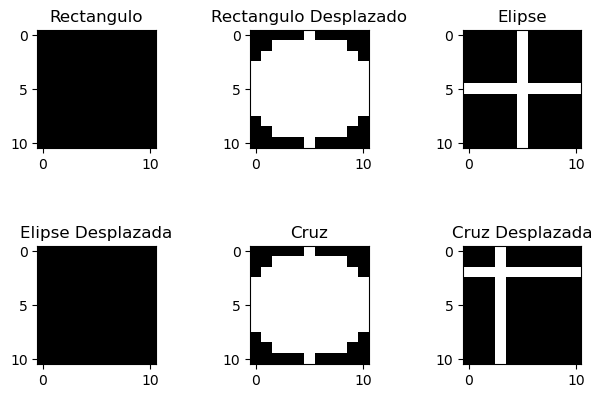

In [33]:
Rect_Center     =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (-1,-1))
Rect_Shift      =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (3,2))

Ellipse_Center  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (-1,-1))
Ellipse_Shift   =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (3,2))

Cross_Center    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (-1,-1))
Cross_Shift     =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (3,2))

plt.figure(1)
plt.subplot(231), plt.imshow(Rect_Center, cmap=plt.cm.gray), plt.title('Rectangulo')
plt.subplot(232), plt.imshow(Ellipse_Center, cmap=plt.cm.gray), plt.title('Rectangulo Desplazado')
plt.subplot(233), plt.imshow(Cross_Center, cmap=plt.cm.gray), plt.title('Elipse')
plt.subplot(234), plt.imshow(Rect_Shift, cmap=plt.cm.gray), plt.title('Elipse Desplazada')
plt.subplot(235), plt.imshow(Ellipse_Shift, cmap=plt.cm.gray), plt.title('Cruz')
plt.subplot(236), plt.imshow(Cross_Shift, cmap=plt.cm.gray), plt.title('Cruz Desplazada')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

# Anchor position within the element. The default value means that the anchor is at the center. Note that only the shape of a cross-shaped element depends on the anchor position. In other cases the anchor just regulates how much the result of the morphological operation is shifted.

***2. Dilatacion***

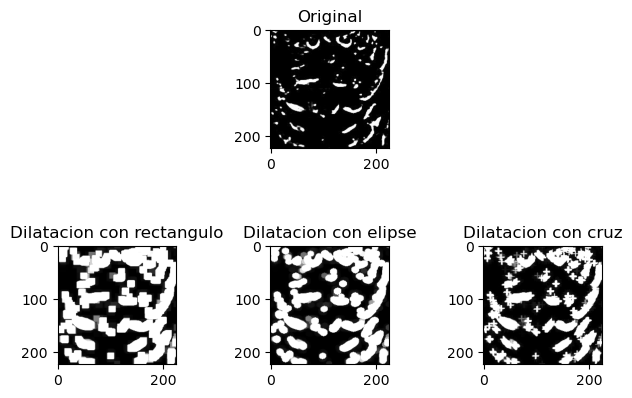

In [41]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Dilate_Rect      =   cv2.dilate(Test,Rect)
Dilate_Ellipse   =   cv2.dilate(Test,Ellipse)
Dilate_Cross     =   cv2.dilate(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Dilate_Rect, cmap=plt.cm.gray), plt.title('Dilatacion con rectangulo')
plt.subplot(235), plt.imshow(Dilate_Ellipse, cmap=plt.cm.gray), plt.title('Dilatacion con elipse')
plt.subplot(236), plt.imshow(Dilate_Cross, cmap=plt.cm.gray), plt.title('Dilatacion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***3. Erosion***

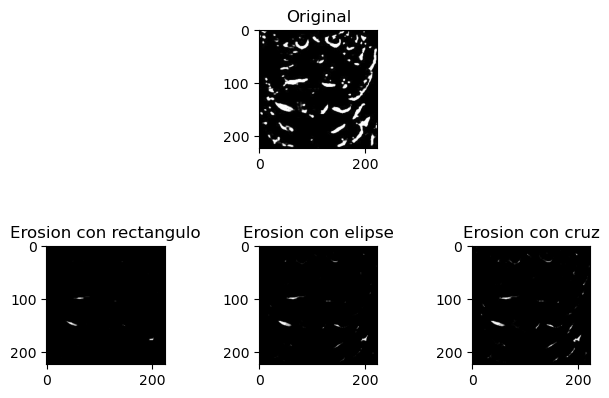

In [43]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (7,7), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Erode_Rect      =   cv2.erode(Test,Rect)
Erode_Ellipse   =   cv2.erode(Test,Ellipse)
Erode_Cross     =   cv2.erode(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Erode_Rect, cmap=plt.cm.gray), plt.title('Erosion con rectangulo')
plt.subplot(235), plt.imshow(Erode_Ellipse, cmap=plt.cm.gray), plt.title('Erosion con elipse')
plt.subplot(236), plt.imshow(Erode_Cross, cmap=plt.cm.gray), plt.title('Erosion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***4. Apertura***

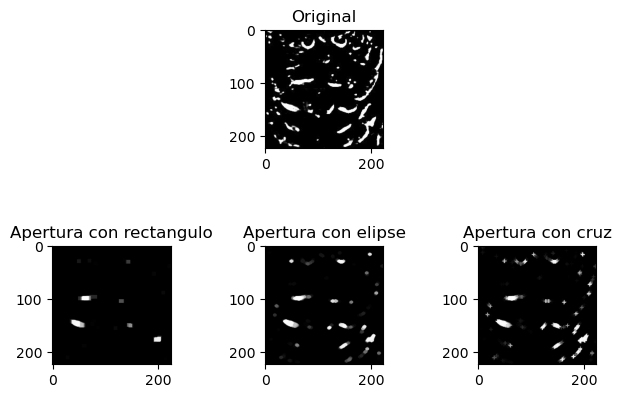

In [46]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (7,7), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Open_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_OPEN,Rect)
Open_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_OPEN,Ellipse)
Open_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_OPEN,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Open_Rect, cmap=plt.cm.gray), plt.title('Apertura con rectangulo')
plt.subplot(235), plt.imshow(Open_Ellipse, cmap=plt.cm.gray), plt.title('Apertura con elipse')
plt.subplot(236), plt.imshow(Open_Cross, cmap=plt.cm.gray), plt.title('Apertura con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***5. Cierre***

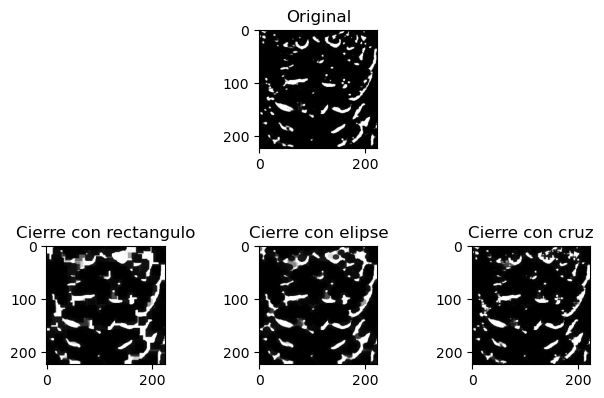

In [49]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Close_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Rect)
Close_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Ellipse)
Close_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Close_Rect, cmap=plt.cm.gray), plt.title('Cierre con rectangulo')
plt.subplot(235), plt.imshow(Close_Ellipse, cmap=plt.cm.gray), plt.title('Cierre con elipse')
plt.subplot(236), plt.imshow(Close_Cross, cmap=plt.cm.gray), plt.title('Cierre con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***6. Gradiente***

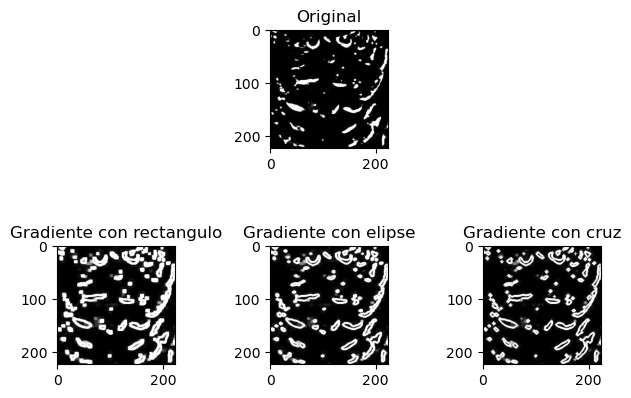

In [56]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (5,5), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Gradient_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_GRADIENT,Rect)
Gradient_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_GRADIENT,Ellipse)
Gradient_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_GRADIENT,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Gradient_Rect, cmap=plt.cm.gray), plt.title('Gradiente con rectangulo')
plt.subplot(235), plt.imshow(Gradient_Ellipse, cmap=plt.cm.gray), plt.title('Gradiente con elipse')
plt.subplot(236), plt.imshow(Gradient_Cross, cmap=plt.cm.gray), plt.title('Gradiente con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***7. TopHat***

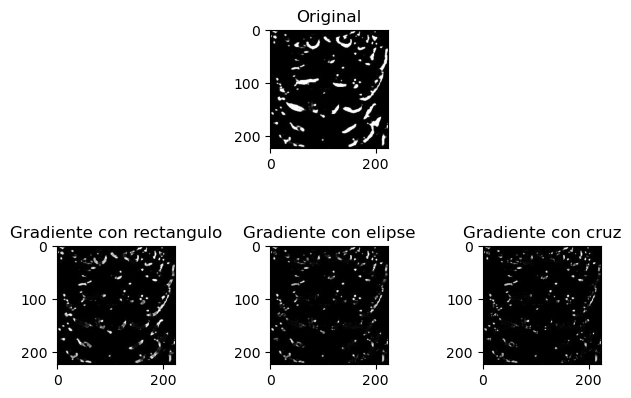

In [58]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (9,9), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

TopHat_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_TOPHAT,Rect)
TopHat_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_TOPHAT,Ellipse)
TopHat_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_TOPHAT,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(TopHat_Rect, cmap=plt.cm.gray), plt.title('TopHat con rectangulo')
plt.subplot(235), plt.imshow(TopHat_Ellipse, cmap=plt.cm.gray), plt.title('TopHat con elipse')
plt.subplot(236), plt.imshow(TopHat_Cross, cmap=plt.cm.gray), plt.title('TopHat con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***8. BlackHat***

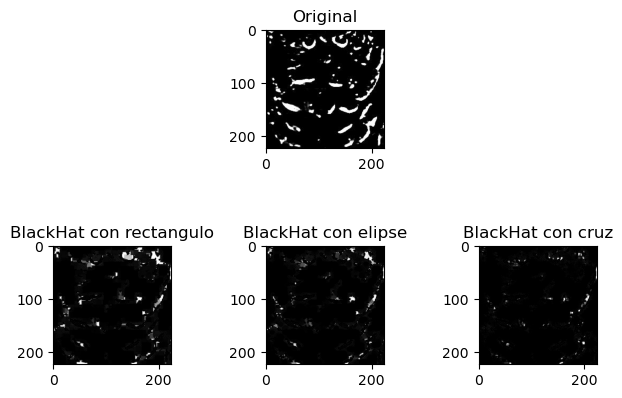

In [62]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (9,9), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

BlackHat_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_BLACKHAT,Rect)
BlackHat_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_BLACKHAT,Ellipse)
BlackHat_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_BLACKHAT,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(BlackHat_Rect, cmap=plt.cm.gray), plt.title('BlackHat con rectangulo')
plt.subplot(235), plt.imshow(BlackHat_Ellipse, cmap=plt.cm.gray), plt.title('BlackHat con elipse')
plt.subplot(236), plt.imshow(BlackHat_Cross, cmap=plt.cm.gray), plt.title('BlackHat con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***9. Filtro Morfologico - Apertura/Cierre***

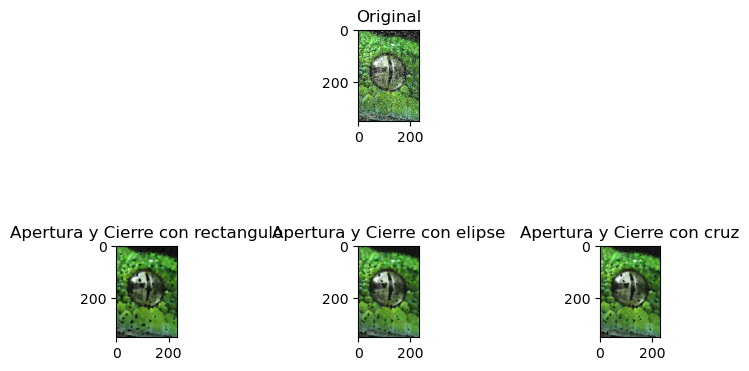

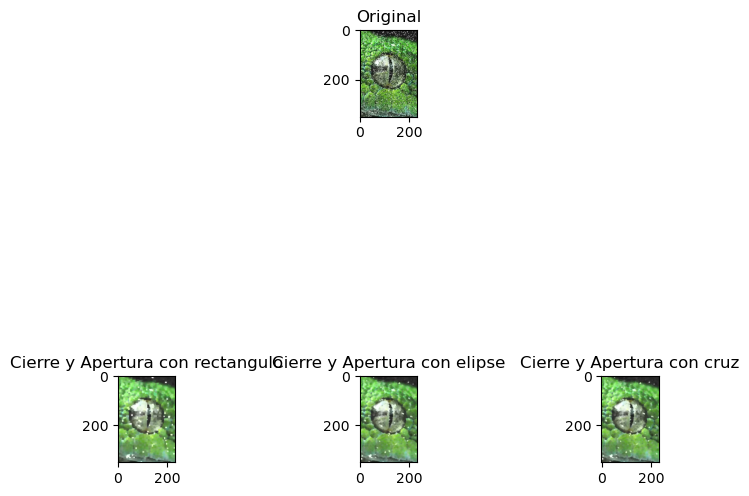

In [75]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (5,5), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5), (-1,-1))


Test  =   cv2.imread('Images/Salt_Pepper_2.png',1)

Open_Close_Rect      =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_OPEN,Rect),cv2.MORPH_CLOSE,Rect)
Open_Close_Ellipse   =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_OPEN,Ellipse),cv2.MORPH_CLOSE,Cross)
Open_Close_Cross     =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_OPEN,Ellipse),cv2.MORPH_CLOSE,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test[:,:,::-1], cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Open_Close_Rect[:,:,::-1], cmap=plt.cm.gray), plt.title('Apertura y Cierre con rectangulo')
plt.subplot(235), plt.imshow(Open_Close_Ellipse[:,:,::-1], cmap=plt.cm.gray), plt.title('Apertura y Cierre con elipse')
plt.subplot(236), plt.imshow(Open_Close_Cross[:,:,::-1], cmap=plt.cm.gray), plt.title('Apertura y Cierre con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()


Close_Open_Rect      =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Rect),cv2.MORPH_OPEN,Rect)
Close_Open_Ellipse   =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Ellipse),cv2.MORPH_OPEN,Cross)
Close_Open_Cross     =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Ellipse),cv2.MORPH_OPEN,Cross)

plt.figure(2)
plt.subplot(232), plt.imshow(Test[:,:,::-1], cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Close_Open_Rect[:,:,::-1], cmap=plt.cm.gray), plt.title('Cierre y Apertura con rectangulo')
plt.subplot(235), plt.imshow(Close_Open_Ellipse[:,:,::-1], cmap=plt.cm.gray), plt.title('Cierre y Apertura con elipse')
plt.subplot(236), plt.imshow(Close_Open_Cross[:,:,::-1], cmap=plt.cm.gray), plt.title('Cierre y Apertura con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***10. Dilatacion - Color***

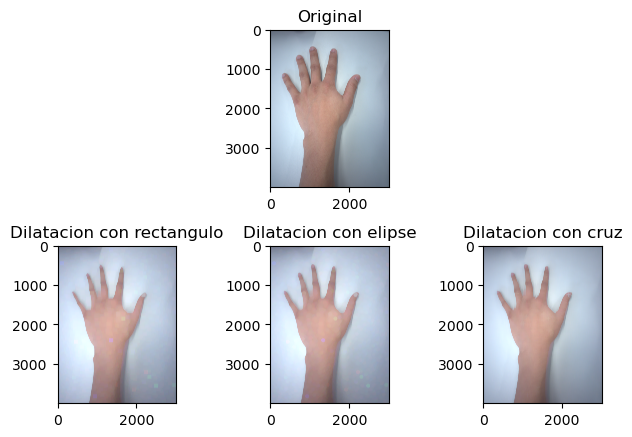

In [66]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (100,100), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100,100), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (100,100), (-1,-1))


Test  =   cv2.imread('Images/Img_Indoor_1.png',1)

Dilate_Rect      =   cv2.dilate(Test,Rect)
Dilate_Ellipse   =   cv2.dilate(Test,Ellipse)
Dilate_Cross     =   cv2.dilate(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test[:,:,::-1], cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Dilate_Rect[:,:,::-1], cmap=plt.cm.gray), plt.title('Dilatacion con rectangulo')
plt.subplot(235), plt.imshow(Dilate_Ellipse[:,:,::-1], cmap=plt.cm.gray), plt.title('Dilatacion con elipse')
plt.subplot(236), plt.imshow(Dilate_Cross[:,:,::-1], cmap=plt.cm.gray), plt.title('Dilatacion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***11. Erosion - Color***

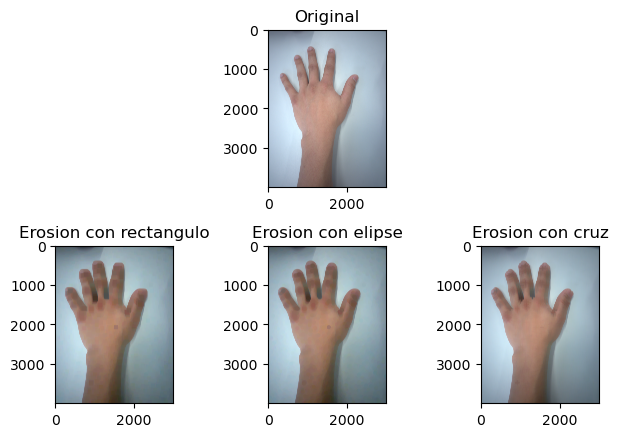

In [65]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (100,100), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100,100), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (100,100), (-1,-1))


Test  =   cv2.imread('Images/Img_Indoor_1.png',1)

Erode_Rect      =   cv2.erode(Test,Rect)
Erode_Ellipse   =   cv2.erode(Test,Ellipse)
Erode_Cross     =   cv2.erode(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test[:,:,::-1], cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Erode_Rect[:,:,::-1], cmap=plt.cm.gray), plt.title('Erosion con rectangulo')
plt.subplot(235), plt.imshow(Erode_Ellipse[:,:,::-1], cmap=plt.cm.gray), plt.title('Erosion con elipse')
plt.subplot(236), plt.imshow(Erode_Cross[:,:,::-1], cmap=plt.cm.gray), plt.title('Erosion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()